# LibraryThings Recommendation System

## 1. Loading reviews.txt

In [23]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# importing the library
import numpy as np
import pandas as pd

In [26]:
# reading the file
review_list = []
with open('/content/drive/MyDrive/reviews.txt', 'r') as f:
    for line in f:
        if line == 'reviews = {}\n':
            continue
        try:
            _, review = line.split(')] = ')
            review_list.append(ast.literal_eval(review))
        except:
            print(line)
            break

In [28]:
# converting it into dataframe
reviews_df = pd.DataFrame(review_list)

In [7]:
reviews_df

,comment,nhelpful,unixtime,work,flags,user,stars,time
0,"Every evening, the brave queen of Persia, Shah...",0,1.332288e+09,73960,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
1,Its the 1983-84 school year and Edward Zanni o...,0,1.253405e+09,69413,[],rivkat,3.0,"Sep 20, 2009"
2,"I became privy to this book, when another auth...",0,1.299888e+09,9523995,[],suz.haugland,4.0,"Mar 12, 2011"
3,.,0,1.327277e+09,368228,[],amoskovacs,4.0,"Jan 23, 2012"
4,This is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,[],CandyH,4.0,"Feb 12, 2012"
...,...,...,...,...,...,...,...,...
1707065,This is quite possibly the cutest kids book I'...,0,1.327795e+09,129503,[],evementen,NaN,"Jan 29, 2012"
1707066,This is a fairy tale which is very much a Cupi...,0,1.364688e+09,11749693,[],AmyMacEvilly,5.0,"Mar 31, 2013"
1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1.176682e+09,4873693,[],tamaranth,4.5,"Apr 16, 2007"
1707068,Despus del extraordinario xito de Los ojos ama...,0,1.321920e+09,9705446,[],bibliosa,NaN,"Nov 22, 2011"


## 2. Understanding the data

Looking at the data, we have the following columns:
* comment: User review/comments about the book
* nhelpful: Number of users who found the review/comment helpful
* unixtime: UNIX time when review/comment was submitted
* work: Book identifier
* flags: Can be from the following values: \['', 'not_a_review', 'abuse'\]
* user: Username
* stars: Ratings on a scale of 5
* time: Date when review was submitted

Based on the following, it seems that *unixtime* and *time* represent the same, and are therefore redundant.

In [29]:
# finding the null values
reviews_df.isna().sum()

comment          0
nhelpful         0
unixtime        90
work             0
flags            0
user             0
stars       319861
time            90
dtype: int64

In [30]:
# droping the null values
reviews_df.dropna(inplace=True)

In [31]:
reviews_df.isna().sum()

comment     0
nhelpful    0
unixtime    0
work        0
flags       0
user        0
stars       0
time        0
dtype: int64

### 2.1 Duplicate samples

In [19]:
# finding and droping the duplicate values
review_df[review_df.duplicated()]

,comment,nhelpful,unixtime,work,user,stars,time,abuse,not_a_review


It seems that there are no duplictes.

### 2.3 stars
We see that all ratings are between 0 and 5, with increments of 0.5.

In [ ]:
review_df['stars'].unique()

array([4.5, 3. , 4. , 2. , 3.5, 5. , 1. , 2.5, 0.5, 1.5])

### 2.4 nhelpful

In [ ]:
review_df['nhelpful'].unique()

array([  0,   6,   2,   1,   5,   7,   3,   4,  16,  22,  12,  18,  11,
        21,  13,  10,   9,   8,  47,  20,  30,  33,  15,  19,  28,  37,
        31,  23,  14,  26,  17,  36,  25,  72,  52,  27,  34,  58,  48,
        24,  63,  79,  32,  38, 129,  75,  29,  46, 332, 108,  40,  87,
        39,  68, 189,  59, 152, 100,  66,  44,  82,  41,  78,  45,  60,
        43, 316,  49,  76,  70,  77,  55,  67,  74])

In [ ]:
review_df['nhelpful'].value_counts()

0     1203898
1      117058
2       25988
3        9051
4        3947
       ...   
63          1
52          1
72          1
47          1
74          1
Name: nhelpful, Length: 74, dtype: int64

In [ ]:
type(review_df['nhelpful'].value_counts())

pandas.core.series.Series

In [20]:
from matplotlib import pyplot as plt 

<Axes: >

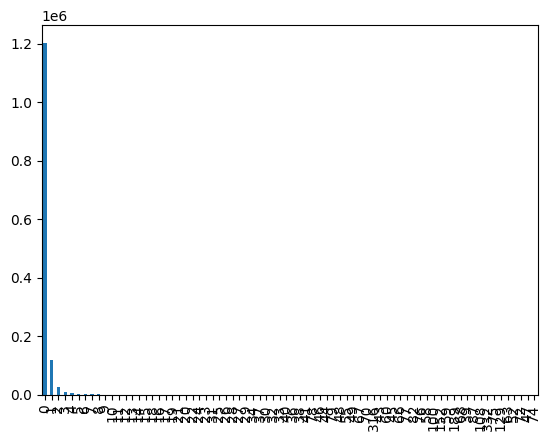

In [21]:
review_df['nhelpful'].value_counts().plot(kind='bar')

This is expected as most books are not a popular. People may therefore never read the reviews for these books and hence never find the reviews helpful.

### 2.5 comment

We see that there are a few comments with URLs. We need to clean these to ensure proper embeddings.

In [22]:
review_df[review_df['comment'].str.contains('http|www')]

,comment,nhelpful,unixtime,work,user,stars,time,abuse,not_a_review
11,Monitor life.\nhttp://freesf.strandedinoz.com/...,0,1.309910e+09,11162023,BlueTysonSS,3.5,"Jul 6, 2011",False,False
12,You enter the moment of the naked lunch when y...,6,1.286150e+09,5852,funkendub,5.0,"Oct 4, 2010",False,False
14,"In these days of Echelon, Satellite spying, an...",1,1.169856e+09,1472,bluetyson,5.0,"Jan 27, 2007",False,False
29,C'est pour moi une premire exprience avec l'au...,0,1.365034e+09,8311485,Moncoinlecture,3.0,"Apr 4, 2013",False,False
61,Review posted here: http://offbeatvagabond.blo...,1,1.336090e+09,11357432,harleyquinn0887,5.0,"May 4, 2012",False,False
...,...,...,...,...,...,...,...,...,...
1706975,http://boekenwijs.blogspot.com/2008/05/heart-o...,0,1.210464e+09,2575,boekenwijs,2.0,"May 11, 2008",False,False
1706999,http://nwhyte.livejournal.com/1700514.html\nHe...,0,1.302307e+09,1411914,nwhyte,3.5,"Apr 9, 2011",False,False
1707039,http://library.tom-hanna.org/2007/margaret-lob...,0,1.189037e+09,35552,tomhanna,4.0,"Sep 6, 2007",False,False
1707063,http://olvasonaplo.freeblog.hu/archives/2007/0...,0,1.209082e+09,76280,sorsha,3.0,"Apr 25, 2008",False,False


In [23]:
# Percentage reviews with containing 'http' or 'www'

83774/review_df.shape[0]

0.061266294908126885

In [24]:
# URL not guaranteed to contain with 'http'.
review_df[review_df['comment'].str.contains(' www')]

,comment,nhelpful,unixtime,work,user,stars,time,abuse,not_a_review
12,You enter the moment of the naked lunch when y...,6,1.286150e+09,5852,funkendub,5.0,"Oct 4, 2010",False,False
162,It's a real shame for Monica Pradhan that AMy ...,0,1.321488e+09,2411376,bookczuk,3.0,"Nov 17, 2011",False,False
451,"What is it like... to be considered: ""Genius?""...",0,1.224634e+09,5787763,ANovelMenagerie,4.0,"Oct 22, 2008",False,False
1084,I received this book through www.librarything....,0,1.323216e+09,11357953,apsing01,4.0,"Dec 7, 2011",False,False
1147,"I decided to read this book, because the topic...",0,1.307664e+09,7997468,Princetonbookreview,4.0,"Jun 10, 2011",True,False
...,...,...,...,...,...,...,...,...,...
1703742,"Nel silenzio della campagna pugliese, in un'es...",1,1.179619e+09,5950304,Streghissima,5.0,"May 20, 2007",False,False
1704179,"I bought this from Amazon at random, as I have...",0,1.360368e+09,11160219,nina.jon,4.0,"Feb 9, 2013",False,False
1705436,"In current day India, the police have called i...",0,1.301616e+09,9819803,Nickelini,4.0,"Apr 1, 2011",False,False
1705511,From the writers of the website www.gofugyours...,0,1.364688e+09,4792292,JenJ.,4.0,"Mar 31, 2013",False,False


We need to remove the URLs and use the remaining text as part of reviews. Also need to clean up any special characters, and handle escape sequences.

In [25]:
comments = review_df['comment'].copy()

In [ ]:
comments

0          Every evening, the brave queen of Persia, Shah...
1          Its the 1983-84 school year and Edward Zanni o...
2          I became privy to this book, when another auth...
3                                                      .    
4          This is a tremendous story of a freed woman an...
                                 ...                        
1707063    http://olvasonaplo.freeblog.hu/archives/2007/0...
1707064    I came to this book with low expectations. The...
1707066    This is a fairy tale which is very much a Cupi...
1707067    http://tamaranth.blogspot.com/1994/03/guilty-p...
1707069    I originally met most of the diseases covered ...
Name: comment, Length: 1363410, dtype: object

#### 2.5.1 Clean URLs

In [26]:
import re

In [27]:
re.sub('https?://[\S]+|www\.[\S]+', '',
       'http://tamaranth.blogspot.com/1994/03/guilty-pleasures-laurell-k-hamilton.html ')

' '

In [28]:
re.sub('https?://[\S]+|www\.[\S]+',
       '',
       """I received this book through www.librarything.com and it's early reviewer's program. I really didn't know what to expect when I received this ebook. I started the book yesterday and finished it in one day. It was very engaging. The characters were interesting and the story was fast-paced. There were parts that were thrilling, especially the beginning. The off the wall antics of Brian help lighten the story. I enjoyed traveling along with Brenda and Brian, especially the dinner with the parents scene. I wish that it had been a little longer because I'm dying to know what happens next. The ending is a bit of a cliffhanger. Yes, they solved the immediate issue with the criminal at hand but who were those other people and what do they want? I really do think that this book is a great one. The author really knows how to make people laugh at the sheer craziness of the book. \nhttp://letthemalleatcake.blogspot.com/2011/12/medium-dead-by-chris-dolley.html 

""")

"I received this book through  and it's early reviewer's program. I really didn't know what to expect when I received this ebook. I started the book yesterday and finished it in one day. It was very engaging. The characters were interesting and the story was fast-paced. There were parts that were thrilling, especially the beginning. The off the wall antics of Brian help lighten the story. I enjoyed traveling along with Brenda and Brian, especially the dinner with the parents scene. I wish that it had been a little longer because I'm dying to know what happens next. The ending is a bit of a cliffhanger. Yes, they solved the immediate issue with the criminal at hand but who were those other people and what do they want? I really do think that this book is a great one. The author really knows how to make people laugh at the sheer craziness of the book. \n \n\n"

In [29]:
reviews_df['comment']=reviews_df['comment'].str.replace('https?://[\S]+|www\.[\S]+', '', regex = True)

While we see some obvious invalid URLs due to user errors, a some are confusing. Let'slookat the below example.

It seems that the user mistakenly introduced a space between 'http://' and 'www'. We can fix these issues manually as we only have a handful of entries.

In [30]:
reviews_df['comment']=reviews_df['comment'].str.replace('https?://[\S]*|https?:/[\S]+|https?//:[\S]*|https?/:[\S]*|http:', '', regex = True)

In [31]:
reviews_df['comment']=reviews_df['comment'].str.replace("[^a-zA-Z0-9 ]",'',regex="True")
reviews_df['comment']=reviews_df['comment'].str.lower()
reviews_df['comment']=reviews_df['comment'].str.replace("\s+"," ",regex="True")

As we can see below, the remaining entries only contain http as par of the content.

In [32]:
#### SVD
!pip install scikit-surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# importing the library
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate

#  reviews_df containing user name, item ID, and ratings and creating the reader for the svd
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(reviews_df[['user', 'work', 'stars']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD algorithm
algo = SVD()

# Fit the algorithm on the training set
cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)


# Make predictions on the test set
avg_rmse = round(np.mean(cv_results['test_rmse']), 3)
print("Average RMSE:", avg_rmse)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8887  0.8862  0.8846  0.8864  0.8873  0.8866  0.0014  
Fit time          35.90   39.16   37.42   40.07   39.63   38.44   1.55    
Test time         2.76    2.75    4.07    3.13    2.64    3.07    0.52    
Average RMSE: 0.887
